### Importaciones

In [50]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos ya transformados y listos

In [28]:
file_path = r"C:\Users\Danie\OneDrive\Escritorio\Workshop03\data\merged.csv"
df = pd.read_csv(file_path)

### Variables predictoras y objetivo

In [30]:
features = ["gdp_per_capita", "social_support", "life_expectancy", "freedom", "corruption"]
target = "happiness_score"

X = df[features]
y = df[target]
# Divisón de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entrenamiento del modelo

In [53]:
models = {
    'linear_regression' : LinearRegression(),
    'random_forest' : RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost' : XGBRegressor(eval_metric='logloss', random_state=42)
}

results = []

results.clear()

model_dir = r"C:\Users\Danie\OneDrive\Escritorio\Workshop03\models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics = {
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }
    
    
    results.append(metrics)

    if name == 'random_forest':
        model_path = os.path.join(model_dir, 'random_forest_model.pkl')
        
        try:
            joblib.dump(model, model_path)
            print(f"Modelo guardado en: {model_path}")
        except Exception as e:
            print(f"Error al guardar el modelo: {e}")

results_df = pd.DataFrame(results)

print(results_df)

Modelo guardado en: C:\Users\Danie\OneDrive\Escritorio\Workshop03\models\random_forest_model.pkl
               Model       MSE       MAE        R2
0  linear_regression  0.349929  0.452279  0.719733
1      random_forest  0.294861  0.416029  0.763838
2            XGBoost  0.343545  0.462573  0.724846


### Impacto de las variables

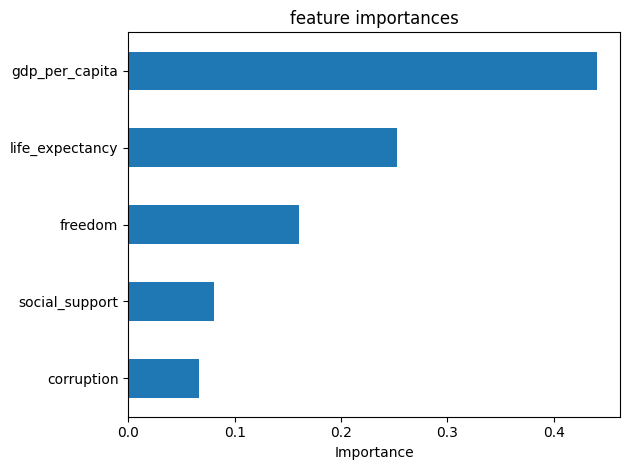

In [32]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title="feature importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

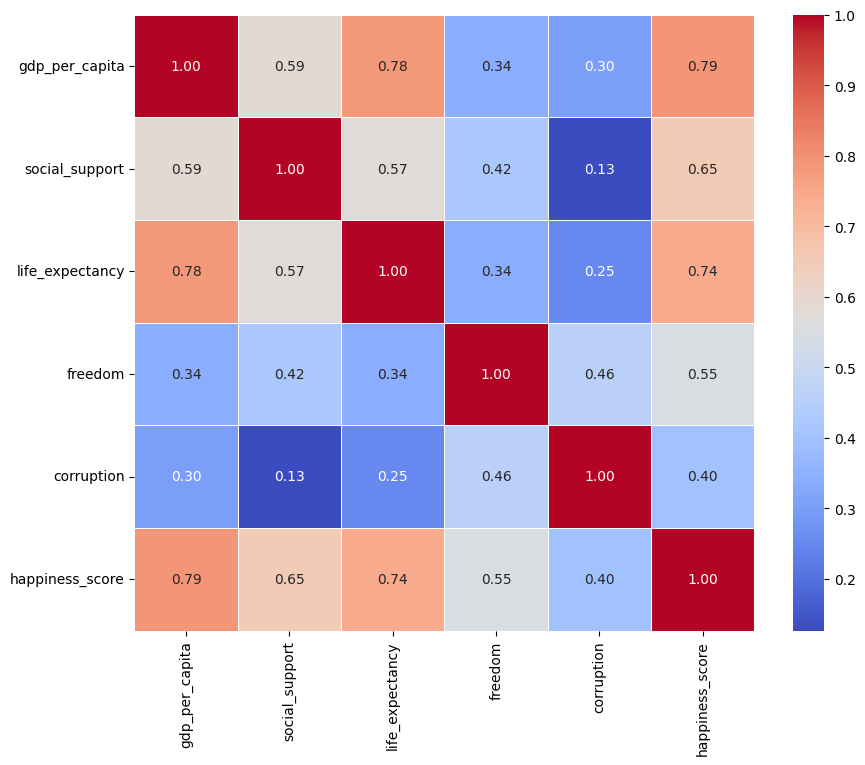

In [54]:
corr_matrix = df[features + [target]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

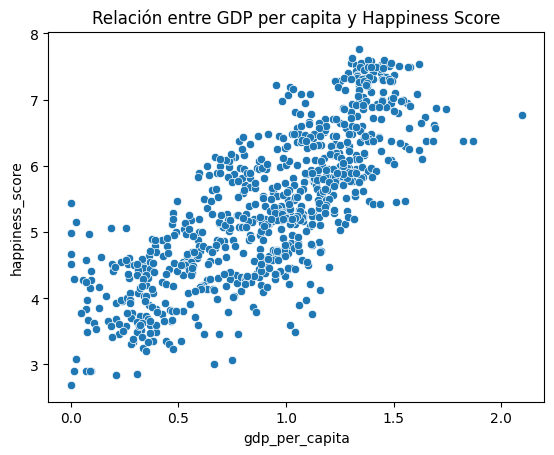

In [34]:
# Visualizar relación entre 'gdp_per_capita' y 'happiness_score'
sns.scatterplot(data=df, x='gdp_per_capita', y='happiness_score')
plt.title('Relación entre GDP per capita y Happiness Score')
plt.show()
